Luke Gulson: [https://lgulson12.github.io/Data-Science-Final](https://lgulson12.github.io/Data-Science-Final)

Light housekeeping to get `pandas` working and proprely connected to Gooogle Collab.

In [36]:
import pandas as pd 
import numpy as np
import re
pd.set_option("display.max_rows", None, "display.max_columns", None)
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab_Notebooks/Final_Tutorial

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab_Notebooks/Final_Tutorial


# **Video Media and Attention Span**

By Luke Gulson

**Project Goals**

The goal of this project is to explore whether TV viewers have become more in favor of shorter and more quickly consumable content in recent years. People tend to associate the younger generations of today (Millenials/Gen Z) with shorter attention spans, and I decided I'd set out to see if data about television viewership supported this. Additionally, I've sampled some data pertaining to trending YouTube videos to see if the same pattern emmerged there. I wanted to see specifically if there was any trends or correlation between runtimes of television shows and YouTube videos and the review scores they recieved.

# **Streaming Site Datasets**

The first two tables here will be based on five different datasets, all acquired from [kaggle](https://kaggle.com) which contains data from over 20,000 different shows and movies available the top streaming services - Netflix, HBO Max, Disney+, Amazon Prime, Hulu respectively. Sampled from specifically titles available in the United States as of May - July 2022. Each of these unique titles contains a number of corresponding variables:

* `id`: The title ID on JustWatch.
* `title`: The name of the title.
* `show_type`: TV show or movie.
* `description`: A brief description.
* `release_year`: The release year.
* `age_certification`: The age certification.
* `runtime`: The length of the episode (SHOW) or movie.
* `genres`: A list of genres.
* `production_countries`: A list of countries that produced the title.
* `seasons`: Number of seasons if it's a SHOW.
* `imdb_id`: The title ID on IMDB.
* `imdb_score`: Score on IMDB.
* `imdb_votes`: Votes on IMDB.
* `tmdb_popularity`: Popularity on TMDB.
* `tmdb_score`: Score on TMDB.

While all of these variables are nice and dandy, for our purposes we'll only be looking at the variables: `runtime`, `imdb_score`, `imdb_votes`, `tmdb_popularity`, and `tmdb_score`.

For clarification, IMDB (Internet Movie DataBase) and TMDB (The Movie DataBase) are separate but very similar sites, differing slightly in that TMDB is completely powered by its community, unlike IMDB which sources from internal critics as well as audience reviews. For the purpose of gaining a broader understanding of the subject matter, I'll be analyzing movie rating scores from both of these sites seperately and together.

# YouTube Dataset

Now for the other tables I'll be showing, I'll be using another dataset acquired from [kaggle](https://kaggle.com). This dataset includes many variables corresponding to 115 of the highest trending videos from March of 2007 to June of 2016. Each observation of a video contains the following variables:

* `Position`: An index column which gives the position of the channel in youtube channel 
* `Channel Id`: ID of the youtube channel
* `Channel Title`: Youtube channel title
* `Video Id`: ID of video in the youtube channel
* `Published At`: date of the video published at
* `Video Title`: Title of the video
* `Video Description`: Description of the video(what the video is about)
* `Video Category Id`: Category of the video in youtube channel
* `Video Category Label`:type of category the video belongs 
* `Duration`: duration of the video
* `Duration Sec`: Duration of video in seconds
* `Dimension`: Dimension of the video (2D , Hd) 
* `Definition`: Defining the video
* `Caption`: Boolean type caption (True or False) 
* `Licensed Content`
* `View Count`: number of people viewed the video 
* `Like Count`: Number of likes the channel got
* `Dislike Count`: Number of dislikes the channel got
* `Favorite Count`: Number of people marked as favourite
* `Comment Count`: Number of people commented on the video

While there are a great many variables to be looked at here, we'll only be using `durationSec`, `likeCount`, and `dislikeCount`.

# **ETL (Extraction, Transformation, and Loading)**

In order to be able to actually compare these variables, I need to first manipulate the datasets a bit. With the final goal in mind being, one large DataFrame that contains all of the unique TV shows from all of these different steaming services.

First we need to read in all of the datasets that we have.

In [37]:
netflix_df = pd.read_csv(r'netflix_titles.csv') #import Netflix movies and shows data to a DF
hbo_max_df = pd.read_csv(r'hbo_max_titles.csv') #import HBO Max movies and shows data to a DF
disneyp_df = pd.read_csv(r'disneyp_titles.csv') #import Disney+ movies and shows data to a DF
amazonp_df = pd.read_csv(r'amazonp_titles.csv') #import Amazon Prime movies and shows data to a DF
hulu_df = pd.read_csv(r'hulu_titles.csv') #import Hulu movies and shows data to a DF
youtube_df = pd.read_csv(r'Trending videos on youtube dataset.csv') #import trending YouTube video data to a DF

Then we can move on to combining all of the DataFrames into one which contains only shows and not movies. I decided movies are less of a regularly consumed thing and therefore less relevant to our data analysis.

In [38]:
#Creates one cohesive DataFrame by merging each streaming service's DataFrame together.
combined_df = netflix_df.merge(hbo_max_df, on = ['id', 'title', 'type', 'description', 'release_year', 'age_certification', 'runtime', 'genres', 'production_countries', 'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score'], how = 'outer')
combined_df = combined_df.merge(disneyp_df, on = ['id', 'title', 'type', 'description', 'release_year', 'age_certification', 'runtime', 'genres', 'production_countries', 'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score'], how = 'outer')
combined_df = combined_df.merge(amazonp_df, on = ['id', 'title', 'type', 'description', 'release_year', 'age_certification', 'runtime', 'genres', 'production_countries', 'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score'], how = 'outer')
combined_df = combined_df.merge(hulu_df, on = ['id', 'title', 'type', 'description', 'release_year', 'age_certification', 'runtime', 'genres', 'production_countries', 'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score'], how = 'outer')

#Removes all instances of shows that appear on multiple platforms such that they only appear once and with no duplicates.
combined_df.drop_duplicates()

#Makes a DataFrame which only contains observations that are shows, and not movies.
all_shows_df = combined_df[combined_df.type == 'SHOW']

Now, I've merged all of the databases from the streaming services together and made a new DataFrame containing only TV shows.

In [39]:
#Display the type of each variable in the DataFrame
all_shows_df.dtypes

id                       object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
dtype: object

We can see here that the variables: runtime, seasons, `imdb_score`, `imdb_votes`, `tmdb_popularity`, and `tmdb_score` are already in the table as either a `int64` or `float64` type. This is helpful because we can use this to represent these variables as numerical data in our visualizations. Had they been represented by an object or string, I would've had to cast them to an int or float myself.

In [40]:
#Display the data type of all of youtube_df's features
youtube_df.dtypes

Unnamed: 0              int64
channelId              object
channelTitle           object
videoId                object
publishedAt            object
videoTitle             object
videoDescription       object
videoCategoryId         int64
videoCategoryLabel     object
duration               object
durationSec             int64
definition             object
caption                  bool
viewCount               int64
likeCount             float64
dislikeCount          float64
commentCount          float64
dtype: object

Just as we did with the show DataFrames, we now can see that `durationSec`, `viewCount`, `likeCount`, and `dislikeCount` are all represented as either an `int64` or `float64`. This is beneficial to us, as we can manipulate this data as numerical data to view relationships and perform necessary calculations with it.

#Table 1 - Runtime vs IMDB Scores

Now we can do some work to display our representation of the relationship between runtime and IMDB scores.

In [41]:
#Finds the value of the 10th quantile of imdb_votes
votes_minimum = all_shows_df.imdb_votes.quantile(0.10)

This value is useful, as it informs us what is a basis for 'enough votes' to qualify as a legimate contribution to the data analysis. I chose the 10th quantile, as it seems to include a large enough majority fo the shows without including outliers. The reviews on these shows could greatly skew the data in a way that would make it harder to reach an accurate conclusion.

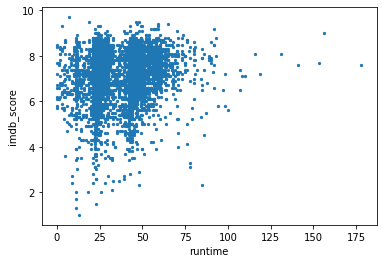

In [42]:
#Creates a DataFrame that includes only shows that are above the established vote minimum
imdb_quantiled_df = all_shows_df[all_shows_df.imdb_votes > votes_minimum]

#Displays a scatter plot comparing runtime and imdb_score
imdb_quantiled_df.plot.scatter(x = 'runtime', y= 'imdb_score', s = 5)

With this chart we can see a representation of the relationship that a show's runtime has with it's imdb score. At first glance, it appears that my claim's being countered by this data. The shows with longer runtimes appear to be just as positively or negatively reviewed as the shows with shorter runtimes.

#Table 2 - Runtime vs TMDB Score

Now we can start a similar process to find a visual representation of the relationship between TV show runtimes and their respective tmdb scores.

In [43]:
#Finds the value of the 10th quantile of tmdb_popularity
popularity_minimum = all_shows_df.tmdb_popularity.quantile(0.10)

While the variable `tmdb_popularity` represents a slightly different quantity from `imdb_votes`, it is still not a good idea to remove data from the dataset that represents less popular shows. Similarly to with `imdb_votes`, I'll be cutting this data down using the 10th quantile value as a baseline. The reviews on these shows could greatly skew the data in a way that would make it harder to reach an accurate conclusion.

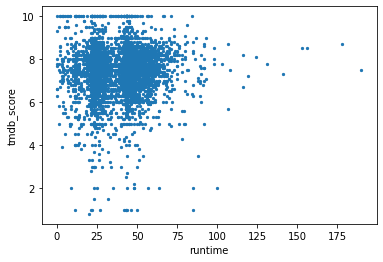

In [44]:
#Creates a new DataFrame with only the shows that are above the established tmdb_popularity minimum
tmdb_quantiled_df = all_shows_df[all_shows_df.tmdb_popularity > popularity_minimum]

#Generates a scatter graph that compares runtime to tmdb_score
tmdb_quantiled_df.plot.scatter(x = 'runtime', y = 'tmdb_score', s = 5)

With this chart we can see a representation of the relationship that a show's runtime has with it's tmdb score. Viewing this chart, it appears that once again, my claim's being countered by this data. There is almost no visible correlationship between any of the runtimes and their TMDB score.

# Table 3 - IMDB & TMDB Comined

For an extra layer of analysis, I'll be looking at a new variable which will combine and average the IMDB and TMDB scores of each respective show. This way we can analyze this data free of the bias of these two reviewing sites.

First, I'll establish the same minimum constraints on a DataFrame as was done with first two tables based on `imdb_votes` and `tmdb_popularity` respectfully.

In [45]:
#Creates a new DataFrame that has the constraints of both votes_minimum and popularity_minimum
imdb_tmdb_df = all_shows_df[(all_shows_df.imdb_votes > votes_minimum)]
imdb_tmdb_df = imdb_tmdb_df[(imdb_tmdb_df.tmdb_popularity > popularity_minimum)]

Now, I'll create a new variable, titled `combined_score` which will represent the average of a particular show's `imdb_score` and `tmdb_score`.

In [46]:
#Creates the variable combined_score, which averages the imdb_score and the tmdb_score
imdb_tmdb_df['combined_score'] = (imdb_tmdb_df['imdb_score'] + imdb_tmdb_df['tmdb_score']) / 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Time to display the data in another scatterplot.

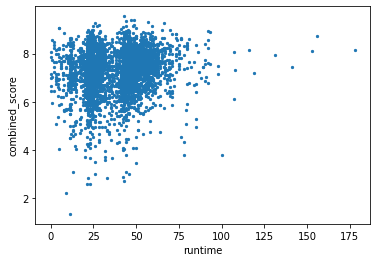

In [47]:
#Displays a scatterplot which compares runtime and combined_score
imdb_tmdb_df.plot.scatter(x = 'runtime', y = 'combined_score', s = 5)

To not much surprise, this graph does not provide any support to the decreased appreciation of longform video. It doesn't support that there's any length of show that's more or less likely to be reviewed well.

# Table 4 - Video Length vs Youtube Viewership

For the next table we'll be looking at, we'll move on to analyzing the dataset from YouTube.

First, let's just take a look at the relationship between `viewCount` and `runtime`. This will give an indication to whether the length of a video has an impact on how popular it is.


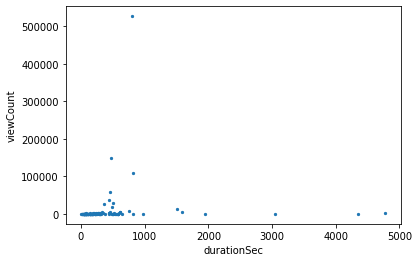

In [48]:
#Display youtube_df as a scatterplot that compares durationSec and viewCount
youtube_df.plot.scatter(x = 'durationSec', y = 'viewCount', s = 5)

As we can see, this graph doesn't really display anything readable. Let's cut down this DataFrame so that it doesn't display the unnecessary outliers.

In [49]:
#Create a new DataFrame with maximum constraints on durationSec and viewCount
youtube_cut = youtube_df[youtube_df['durationSec'] < 1500]
youtube_cut = youtube_cut[youtube_df['viewCount'] < 10000]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


Now let's take a look at this slimmed down graph.

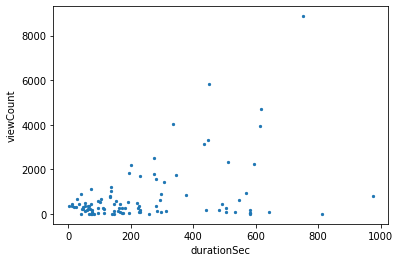

In [50]:
#Display youtube_cut as a scatterplot that compares durationSec and viewCount
youtube_cut.plot.scatter(x = 'durationSec', y = 'viewCount', s = 5)

As we can see here, the data becomes sparser as `durationSec` increases, so it is not discretely indicitive of the negative correlation between legnth of videos and viewership. It does actually provide indication of a slight correlation in the positive sense, however this plot seems to lack strong conclusivity.

# Table 5 - Video Duration vs Youtube Reviews

Now we'll be taking a look at how video duration has an impact on a particular video's reviews. Specifically, we'll be comparing `durationSec` to a calculated difference of `likeCount` and `dislikeCount`.

First, let's create a new feature in the DataFrame that will represent the overall review score of a video based on its `likeCount` and `dislikeCount`. We'll call this new feature: `review_score`.

In [51]:
#Computes and adds the new feature: reviewScore to youtube_df
youtube_df['reviewScore'] = youtube_df['likeCount'] - youtube_df['dislikeCount']

Now that we have that, let's take a look at a graphical representation of that relationship.

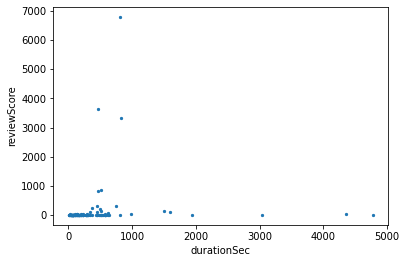

In [52]:
#Displays a scatterplot comparing durationSec and reviewScore
youtube_df.plot.scatter(x = 'durationSec', y = 'reviewScore', s = 5)

We can see that the same issue is presenting itself as with Table 4, so let's slim it down again.

In [53]:
#Creates a new DataFrame with maximum constraints on durationSec and reviewScore
youtube_slimmed = youtube_df[youtube_df['durationSec'] < 1000]
youtube_slimmed = youtube_slimmed[youtube_slimmed['reviewScore'] < 150]

Let's take a look at that graph again.

-1.0


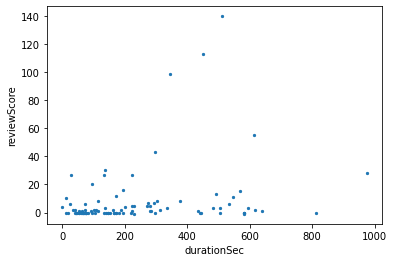

In [54]:
#Displays a scatterplot comparing durationSec and reviewScore
print(youtube_slimmed.reviewScore.min())
youtube_slimmed.plot.scatter(x = 'durationSec', y = 'reviewScore', s = 5)

This scatter plot really just reads as an almost even distribution of scores Once again, we're left with a graphical representation of this data that does not serve to prove any relationship between video media runtime and overall reception.

# **Closing Thoughts and Goals Moving Forward**

Currently, it seems as though the further I delve into this topic, the less there seems to be a relationship where I thought there would be. Perhaps one could simply conclude that digital media is not indicative of this change in human attention span. I do believe that there's more to be seen here, and there's more that I could discover. Perhaps it's time to shift my analysis to answer some side question which is more insightful and actually supported by trends that I find. I've thought of two plausible models that I could manufacture in order to further develop my investigation from here.


1.   The relationship between the age demographic of a reviewer and the favored runtimes of their video media.
2.   A general comparison between review scores and other variables eg. genres, production country, age restrictions, etc.

I believe that shifting my focus towards these two models could move me towards some other questions, specifically what makes a particular piece of video media 'good'. I believe that this line of analysis will make my work more insightful and creative going forward.

Linked below are the sources where I found the datasets I used throughout:

[Netflix TV Shows and Movies](https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies?select=titles.csv)

[HBO Max TV Shows and Movies](https://www.kaggle.com/datasets/victorsoeiro/hbo-max-tv-shows-and-movies?select=titles.csv)

[Disney+ TV Shows and Movies](https://www.kaggle.com/datasets/victorsoeiro/disney-tv-shows-and-movies?select=titles.csv)

[Amazon Prime TV Shows and Movies](https://www.kaggle.com/datasets/victorsoeiro/amazon-prime-tv-shows-and-movies?select=titles.csv)

[Hulu TV Shows and Movies](https://www.kaggle.com/datasets/victorsoeiro/hulu-tv-shows-and-movies?select=titles.csv)

[Trending Videos on Youtube](https://www.kaggle.com/datasets/anushabellam/trending-videos-on-youtube)

Below is just a way of converting my file to HTML.

In [55]:
%%shell
jupyter nbconvert /content/drive/MyDrive/Colab_Notebooks/Final_Tutorial/Luke_Gulson_Milestone_2.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab_Notebooks/Final_Tutorial/Luke_Gulson_Milestone_2.ipynb to html
[NbConvertApp] Writing 459958 bytes to /content/drive/MyDrive/Colab_Notebooks/Final_Tutorial/Luke_Gulson_Milestone_2.html
